#1 Import Libraries and Load Final Dataset

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, roc_curve, auc

# Load the feature-selected data
df = pd.read_csv('../data/final_feature_dataset.csv')

df['target'] = (df['target'] > 0).astype(int)

# You can add this to verify the change
print("Target value counts after conversion:")
print(df['target'].value_counts())

Target value counts after conversion:
target
0    164
1    139
Name: count, dtype: int64


#2 Prepare Data for Modeling

In [8]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (242, 12)
X_test shape: (61, 12)


#3 Train and Evaluate Models

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



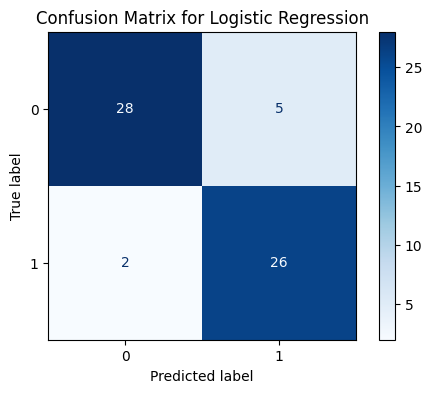

--- Decision Tree Performance ---
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.67      0.71      0.69        28

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.71      0.70      0.71        61



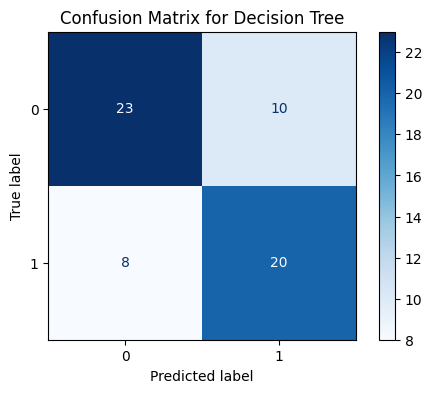

--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



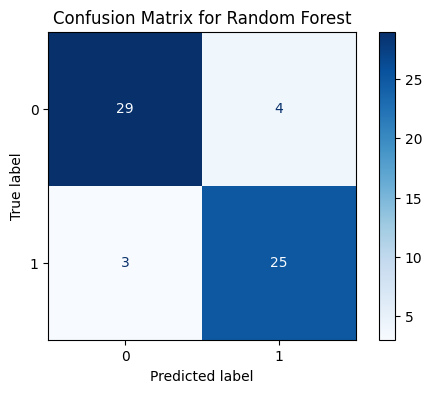

--- Support Vector Machine (SVM) Performance ---
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



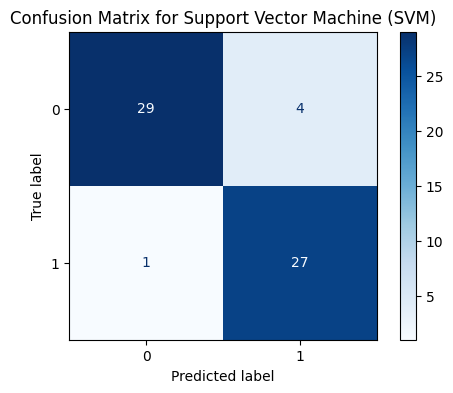

In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42) # probability=True is needed for ROC curve
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print evaluation metrics
    print(f"--- {name} Performance ---")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(6, 4))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

#4 Compare Models with ROC Curves

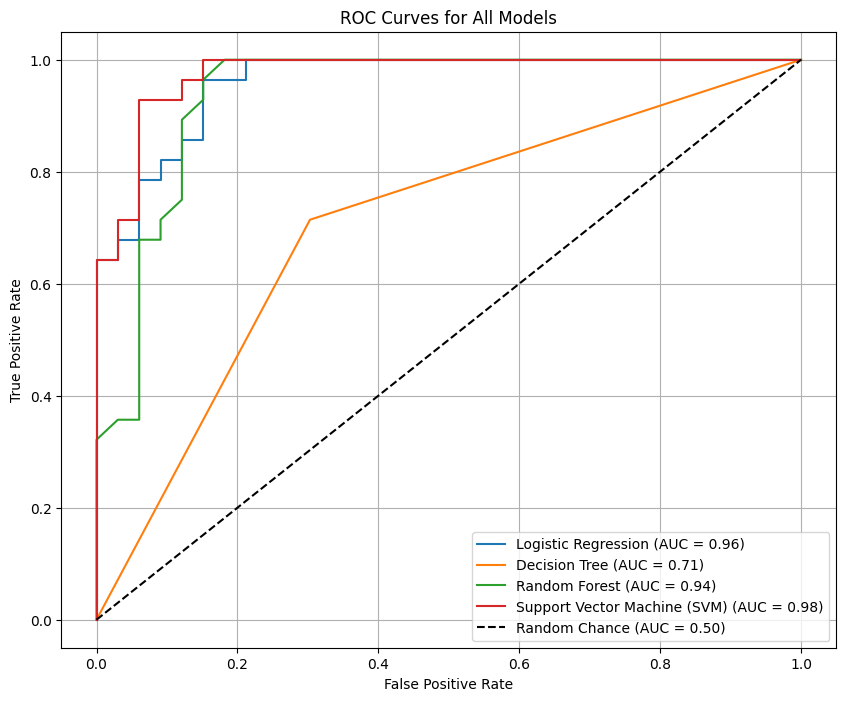

In [10]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Get prediction probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the baseline (random guess)
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()